# 📍 Nearest Points

This demonstration to get the value at the nearest latitude/longitude point builds on info from these sources:

- Stack Overflow: https://stackoverflow.com/questions/58758480/xarray-select-nearest-lat-lon-with-multi-dimension-coordinates
- MetPy Details: https://unidata.github.io/MetPy/latest/tutorials/xarray_tutorial.html?highlight=assign_y_x

In [1]:
from herbie import Herbie
from metpy.units import units
import matplotlib.pyplot as plt
from toolbox import EasyMap, pc, ccrs
import numpy as np
import pandas as pd
import xarray as xr
from shapely.geometry import MultiPoint
from toolbox.gridded_data import pluck_points

In [2]:
H = Herbie("2021-9-23")
ds = H.xarray("TMP:2 m")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2021-Sep-23 00:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


In [3]:
ds

<xarray.Dataset>
Dimensions:              (y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2021-09-23
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 ...
    longitude            (y, x) float64 ...
    valid_time           datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    t2m                  (y, x) float32 ...
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              C:\Users\blaylock\data\hrrr\20210923\subset_1bef...
    searchString:            TMP:2 m

In [4]:
dsi = ds.herbie.nearest_points([(-100, 40), (-115, 34)], names=["point_a", "point_b"])
dsi

c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "t2m".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<xarray.Dataset>
Dimensions:              (point: 2)
Coordinates:
    time                 datetime64[ns] 2021-09-23
    step                 timedelta64[ns] 00:00:00
    heightAboveGround    float64 2.0
    latitude             (point) float64 40.01 33.99
    longitude            (point) float64 260.0 245.0
    valid_time           datetime64[ns] 2021-09-23
    metpy_crs            object Projection: lambert_conformal_conic
    y                    (point) float64 1.707e+05 -3.483e+05
    x                    (point) float64 -2.135e+05 -1.609e+06
  * point                (point) <U7 'point_a' 'point_b'
Data variables:
    t2m                  (point) float32 298.5 310.2
    gribfile_projection  (point) object None None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              C:\Users\blaylock\data\hrrr\20210923\subset_1bef...
    searchString:            TMP:2 m

cfgrib variable: t2m
GRIB_cfName air_temperature
GRIB_cfVarName t2m
GRIB_name 2 metre temperature
GRIB_units K
GRIB_typeOfLevel heightAboveGround



c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "t2m".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
c:\Users\blaylock\Miniconda3\envs\herbie-dev\lib\site-packages\metpy\xarray.py:355: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


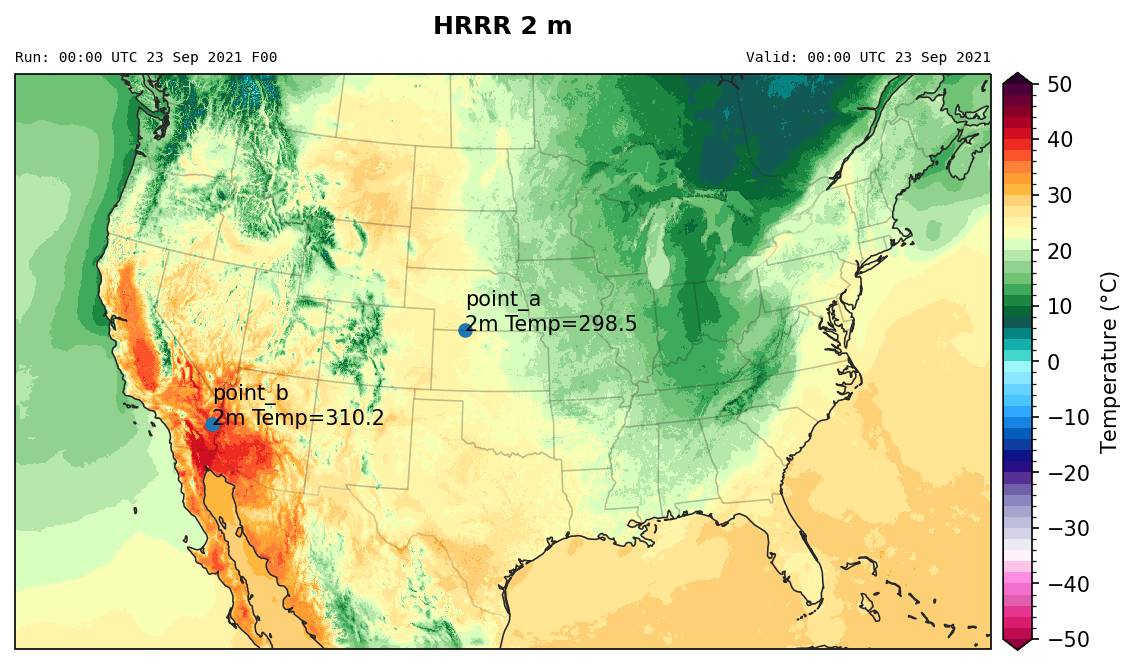

In [5]:
ds.herbie.plot()

plt.scatter(dsi.longitude, dsi.latitude, transform=pc)

for i in dsi.t2m:
    plt.text(
        i.longitude.item(),
        i.latitude.item(),
        f"{i.point.item()}\n2m Temp={i.item():.1f}",
        transform=pc,
    )

We can make timeseries from a point by plucking point from FastHerbie

In [6]:
from herbie import FastHerbie

In [7]:
DATES = pd.date_range("2022-01-01", periods=2, freq="6H")
fxx = range(18)
FH = FastHerbie(DATES=DATES, fxx=fxx, max_threads=1)
ds = FH.xarray("TMP:2 m")
ds

C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")
C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")
C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")
C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")
C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I couldn't remove the file.
  warnings.warn("sorry, on windows I couldn't remove the file.")
C:\Users\blaylock\_GITHUB\Herbie\herbie\archive.py:1041: UserWarning: sorry, on windows I could

<xarray.Dataset>
Dimensions:              (time: 2, step: 18, y: 1059, x: 1799)
Coordinates:
  * time                 (time) datetime64[ns] 2022-01-01 2022-01-01T06:00:00
  * step                 (step) timedelta64[ns] 00:00:00 01:00:00 ... 17:00:00
    heightAboveGround    float64 2.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           (step, time) datetime64[ns] 2022-01-01 ... 2022-01-0...
Dimensions without coordinates: y, x
Data variables:
    t2m                  (step, time, y, x) float32 292.6 292.6 ... 274.9 274.9
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    searchString:            TMP:2 m

In [8]:
dsi = ds.herbie.nearest_points((-100, 40))
dsi

<xarray.Dataset>
Dimensions:              (time: 2, step: 18, point: 1)
Coordinates:
  * time                 (time) datetime64[ns] 2022-01-01 2022-01-01T06:00:00
  * step                 (step) timedelta64[ns] 00:00:00 01:00:00 ... 17:00:00
    heightAboveGround    float64 2.0
    latitude             float64 40.01
    longitude            float64 260.0
    valid_time           (step, time) datetime64[ns] 2022-01-01 ... 2022-01-0...
    metpy_crs            object Projection: lambert_conformal_conic
    y                    float64 1.707e+05
    x                    float64 -2.135e+05
Dimensions without coordinates: point
Data variables:
    t2m                  (point, step, time) float32 267.2 260.9 ... 256.0 258.3
    gribfile_projection  (point) object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    searchString:            TMP:2 m

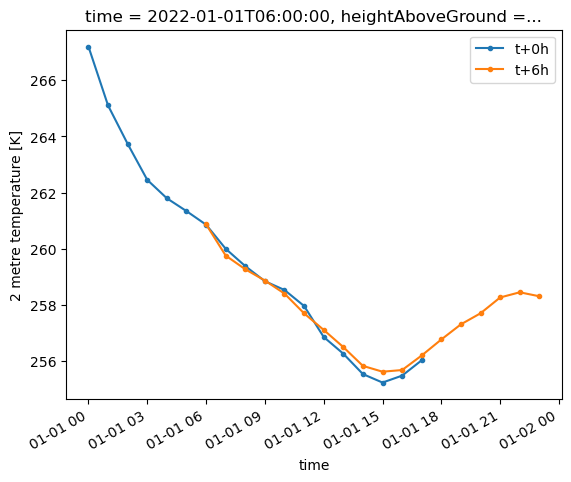

In [10]:
dsi.isel(time=0, point=0).t2m.plot(x="valid_time", marker=".", label="t+0h")
dsi.isel(time=1, point=0).t2m.plot(x="valid_time", marker=".", label="t+6h")
plt.legend()